In [1]:
import numpy as np
import glob, os
import xarray as xr
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import netCDF4 as netcdf
import cftime
import cartopy.crs as ccrs
import h5netcdf
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt
import numpy as np
import regionmask
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import cartopy.crs as ccrs
from matplotlib import colorbar, colors

# Open Datasets

In [2]:
"""Temperature"""
air = xr.open_dataset("woa23_decav_t13_01.nc", decode_times = False).t_mn

"""Salinity""" 
catUrl = "https://www.ncei.noaa.gov/thredds-ocean/catalog/woa23/DATA/salinity/netcdf/decav71A0/1.00/catalog.xml";
datasetName = "woa23_decav71A0_s13_01.nc"
catalog = TDSCatalog(catUrl)
ds_sal = catalog.datasets[datasetName]
dap_url = ds_sal.access_urls['OPENDAP']
xr_sal = xr.open_dataset(dap_url,decode_times=False).s_mn

"""MLD ORAS5"""
files = glob.glob("./ORAS5_MLD/*.nc")
ds = xr.open_mfdataset(files, decode_times=False, engine='h5netcdf', concat_dim='time_counter', combine = "nested")
somxl010 = ds['somxl010']
time_mean = somxl010.mean(dim='time_counter')

In [3]:
def plot_oras5_map(dataset, ax, cmap='viridis', title="ORAS5 Dataset"):
    """Plot ORAS5 data on a given GeoAxes."""
    var_data = dataset
    nav_lat = dataset['nav_lat']
    nav_lon = dataset['nav_lon']

    # Convert to numpy (if lazy-loaded)
    var_data = var_data.compute()
    nav_lat = nav_lat.compute()
    nav_lon = nav_lon.compute()

    #ax.set_title(title, fontsize=20)
    ax.coastlines(resolution='110m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')

    # This is the MAPPABLE object needed for the colorbar
    p = ax.pcolormesh(nav_lon, nav_lat, var_data,
                      cmap=cmap, transform=ccrs.PlateCarree(), shading='auto')

    labrador_sea = Polygon([[-60, 64], [-50, 64], [-50, 55], [-60, 55]])
    ax.add_geometries([labrador_sea], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Greenland Sea (simplified polygon example)
    #greenland_sea = Polygon([[-30, 70], [-5, 70], [-5, 82], [-30, 82]])
    greenland_sea = Polygon([[-20, 68], [-3, 68], [8, 80], [-5, 80], [-20, 68]])
    ax.add_geometries([greenland_sea], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Tropics (simplified polygon example)
    tropics = Polygon([[-70, 30], [20, 30], [20, -30], [-70, -30]])
    ax.add_geometries([tropics], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Southern Ocean (simplified polygon example)
    southern_ocean =  Polygon([[-70, -45], [20, -45], [20, -60], [-70, -60]])
    ax.add_geometries([southern_ocean], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder = 10)
    return p  

def plot_woa23_map(ax):
    p = air.isel(depth=0).plot(
    ax=axes[0],  # tell xarray to use this subplot
    transform=ccrs.PlateCarree(),
    vmin=-5,
    vmax=30,
    cmap="plasma",
    add_colorbar=False,
    )
    ax.set_global()
    ax.set_title("", fontsize=20)
    ax.set_facecolor("grey")
    
    labrador_sea = Polygon([[-60, 64], [-50, 64], [-50, 55], [-60, 55]])
    ax.add_geometries([labrador_sea], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Greenland Sea (simplified polygon example)
    #greenland_sea = Polygon([[-30, 70], [-5, 70], [-5, 82], [-30, 82]])
    greenland_sea = Polygon([[-20, 68], [-3, 68], [8, 80], [-5, 80], [-20, 68]])
    ax.add_geometries([greenland_sea], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Tropics (simplified polygon example)
    tropics = Polygon([[-70, 30], [20, 30], [20, -30], [-70, -30]])
    ax.add_geometries([tropics], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)

    # Southern Ocean (simplified polygon example)
    southern_ocean =  Polygon([[-70, -45], [20, -45], [20, -60], [-70, -60]])
    ax.add_geometries([southern_ocean], crs=ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=2)
    #ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder = 10)
    
    cb1 = fig.colorbar(p, ax=axes[0], orientation="vertical", shrink=0.5)
    cb1.set_label("Temperature $[\\circ\\mathrm{C}]$", fontsize=20)

    ax.text(0.01, 1.1, "(a)", transform=axes[0].transAxes,fontsize=18, fontweight='bold', va='top')
    ax.text(0.5, 0.92, "1", transform=axes[0].transAxes,fontsize=15, fontweight='bold', va='top', color = "white")
    ax.text(0.4, 0.9, "2", transform=axes[0].transAxes,fontsize=15, fontweight='bold', va='top', color = "white")
    ax.text(0.33, 0.66, "3", transform=axes[0].transAxes,fontsize=15, fontweight='bold', va='top', color = "white")
    ax.text(0.36, 0.2, "4", transform=axes[0].transAxes,fontsize=15, fontweight='bold', va='top', color = "white")
    

    ax.text(0.03, -0.05, "1: Nordic Seas", transform=axes[0].transAxes,fontsize=15, va='top')
    ax.text(0.27, -0.05, "2: Labrador Sea", transform=axes[0].transAxes,fontsize=15, va='top')
    ax.text(0.53, -0.05, "3: Tropics", transform=axes[0].transAxes,fontsize=15, va='top')
    ax.text(0.69, -0.05, "4: Southern Ocean", transform=axes[0].transAxes,fontsize=15, va='top')
    return p

# Figure 2

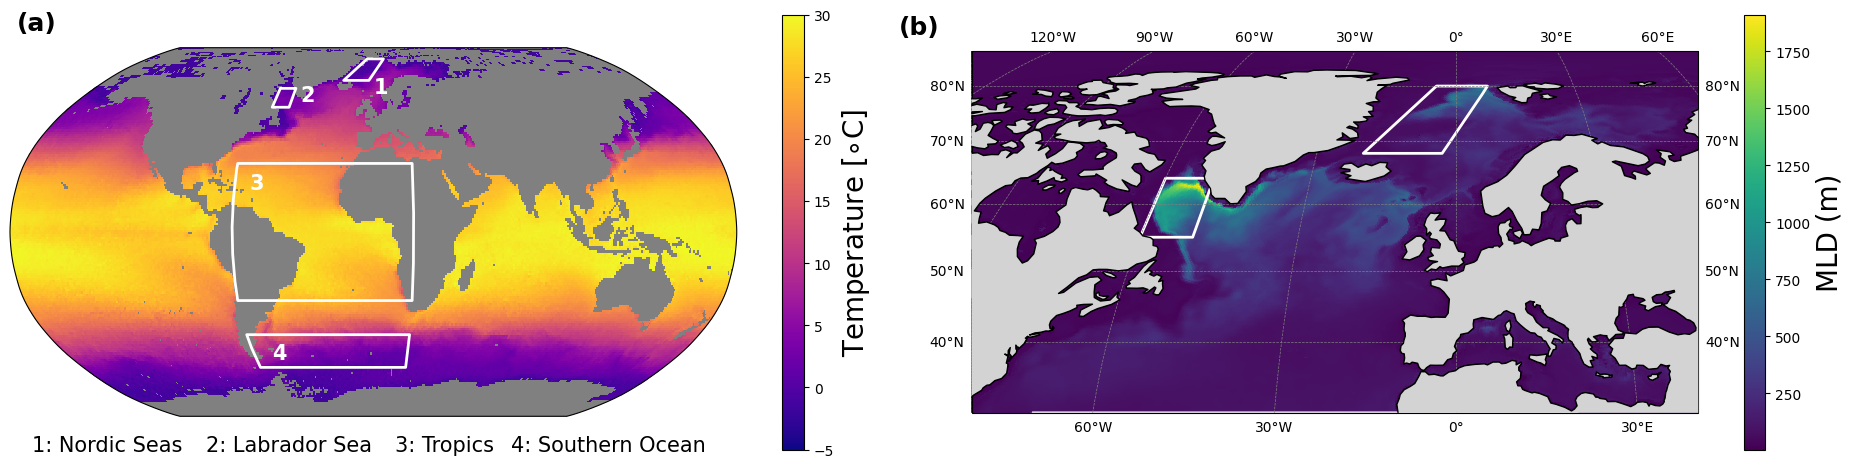

In [4]:
# --- Create combined subplot figure ---
fig, axes = plt.subplots(1, 2, figsize=(19, 9),subplot_kw={'projection': ccrs.Robinson()})

# --- (a) WOA23 MAP ---
p1 = plot_woa23_map(ax = axes[0])

# --- (b) ORAS5 MAP ---
p2 = plot_oras5_map(time_mean, ax=axes[1],cmap='viridis', title="ORAS5 1982–2000 (winter)")
cb2 = fig.colorbar(p2, ax=axes[1], orientation="vertical", shrink=0.5)
cb2.set_label("MLD (m)", fontsize=20)

axes[1].text(-0.1, 1.1, "(b)", transform=axes[1].transAxes,
             fontsize=18, fontweight='bold', va='top')

axes[1].set_extent([-80, 40, 30, 90], crs=ccrs.PlateCarree()) 
plt.tight_layout()
#plt.savefig("WOA23_ORAS5_side_by_side.png", dpi=300)
plt.show()

# Averaging for Fitting

In [48]:
import regionmask
from shapely.geometry import Polygon

def create_mask(region, ds):
    regions = regionmask.Regions(
        [list(region.exterior.coords)],
        numbers=[0]
    )
    return regions.mask(ds.lon, ds.lat)

def regional_depth_mean(ds, mask, depth_min, depth_max):
    return (
        ds.sel(depth=slice(depth_min, depth_max))
          .where(mask == 0)
          .mean(dim=["lat", "lon", "depth"])
    )

In [49]:
"""Define Regions"""
greenland_sea = Polygon([[-20, 68], [-3, 68], [8, 80], [-5, 80], [-20, 68]])
labrador_sea = Polygon([[-60, 64], [-50, 64], [-50, 55], [-60, 55]])
tropics = Polygon([[-70, 30], [20, 30], [20, -30], [-70, -30]])
southern_ocean = Polygon([[-70, -45], [20, -45], [20, -60], [-70, -60]])

In [50]:
mask_T = create_mask(greenland_sea,air)
mask_S = create_mask(greenland_sea,xr_sal)
print("greenland sea surface:", regional_depth_mean(air,mask_T, depth_min=0, depth_max=100).values)
print("greenland sea depth:", regional_depth_mean(air, mask_T, depth_min=100, depth_max=1500).values)
print("greenland sea surface:", regional_depth_mean(xr_sal, mask_S, depth_min=0, depth_max=100).values)
print("greenland sea depth:", regional_depth_mean(xr_sal, mask_S, depth_min=100, depth_max=1500).values)

greenland sea surface: [0.3828422]
greenland sea depth: [0.03142674]
greenland sea surface: [34.82115]
greenland sea depth: [34.897987]


In [24]:
mask_T = create_mask(labrador_sea,air)
mask_S = create_mask(labrador_sea,xr_sal)

print("Labrador Sea surface:", regional_depth_mean(air, mask_T, depth_min=0, depth_max=100).values)
print("Labrador Sea depth:",regional_depth_mean(air, mask_T, depth_min=100, depth_max=3000).values)
print("Labrador Sea surface:", regional_depth_mean(xr_sal, mask_S, depth_min=0, depth_max=100).values)
print("Labrador Sea depth:", regional_depth_mean(xr_sal, mask_S, depth_min=100, depth_max=3000).values)

Labrador Sea surface: [2.5380998]
Labrador Sea depth: [3.6246614]
Labrador Sea surface: [34.422634]
Labrador Sea depth: [34.82687]


In [25]:
mask_T = create_mask(tropics,air)
mask_S = create_mask(tropics,xr_sal)
print("Tropics surface:", regional_depth_mean(air, mask_T, depth_min=0, depth_max=100).values)
print("Tropcs Medium:",regional_depth_mean(air, mask_T, depth_min=100, depth_max=1000).values)
print("Tropcs Deep:",regional_depth_mean(air, mask_T, depth_min=1000, depth_max=3000).values)
print("Tropics surface:", regional_depth_mean(xr_sal, mask_S, depth_min=0, depth_max=100).values)
print("Tropcs Medium:",regional_depth_mean(xr_sal, mask_S, depth_min=100, depth_max=1000).values)
print("Tropcs Deep:",regional_depth_mean(xr_sal, mask_S, depth_min=1000, depth_max=3000).values)

Tropics surface: [22.968294]
Tropcs Medium: [10.7289505]
Tropcs Deep: [3.9792166]
Tropics surface: [36.204445]
Tropcs Medium: [35.207466]
Tropcs Deep: [34.899048]


In [26]:
mask_T = create_mask(southern_ocean,air)
mask_S = create_mask(southern_ocean,xr_sal)
print("Southern Ocean:", regional_depth_mean(air, mask_T, depth_min=0, depth_max=3000).values)
print("Southern Ocean:", regional_depth_mean(xr_sal, mask_S, depth_min=0, depth_max=3000).values)

Southern Ocean: [2.5714164]
Southern Ocean: [34.326088]
